In [67]:
import random

import torch
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# Define a function to load the arrays from the file
def load_arrays_from_file(filename):
    with open(filename, 'r') as file:
        data = file.read().strip().split('\n')  # Read file and split by newline
    
    arrays = []
    for line in data:
        # Convert the string of numbers into a numpy array
        array = np.array([int(x) for x in line.split()])
        arrays.append(array)
    
    return arrays

# Load the arrays
arrays = load_arrays_from_file('hopfield-clean.seq')

In [69]:
len(arrays)

360

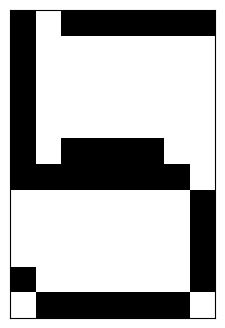

In [70]:
# Define the array
# data = np.array([
#     -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 
#     -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1,
#     1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 
#     -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1,
#     1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 
#     -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1,
#     1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 
#     -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1
# ])

data = random.choice(arrays)
# Reshape to 8x12
data = data.reshape(12, 8)

# Create a colormap for -1 as white and 1 as black
cmap = plt.cm.gray
norm = plt.Normalize(vmin=-1, vmax=1)

# Plot the figure
plt.figure(figsize=(6, 4))
plt.imshow(data, cmap=plt.cm.gray_r, norm=norm)
plt.xticks([])  # No ticks on x axis
plt.yticks([])  # No ticks on y axis
plt.grid(False)
plt.show()

In [82]:
t = np.array(arrays).T
# Assuming t is an SxQ matrix (2D array)
S, Q = t.shape
print(S, Q)
W = np.zeros((S, S))

for k in range(Q):
    W += (1/Q) * np.outer(t[:, k], t[:, k])

# Zeroing the diagonal
np.fill_diagonal(W, 0)

# Placeholder for CY
CY = []

# This function approximates the behavior of the MATLAB satlins function 
# (saturating linear transfer) using np.clip().
def satlins(x):
    return np.clip(x, 0, 1)

# Iterating over each column of t
for k in range(Q):
    u = t[:, k]
    uu = t[:, k]
    while np.linalg.norm(satlins(W @ u) - u) > 0:
        u = satlins(W @ u)
    #print('clip', uu, '->', u)
    CY.append(u)

CY = np.array(CY).T  # Convert list of arrays to 2D array

# Prepare alld array
space = 2
n_copies = 30
n_classes = 12
digit_height = 12
digit_width = 8
alld = np.zeros(
    (n_classes * (digit_height + space) - space, 
    n_copies * (digit_width + space) - space))
print(alld.shape)

96 360
(166, 298)


In [75]:
tt = np.array(CY)
tt.shape
tt[0].reshape(12, 8)

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.37142857, 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.77142857],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.      

In [76]:
for k in range(Q):
    u = t[:, k]
    print(k, u)

0 [-1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1]
1 [-1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1]
2 [-1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1]
3 [-1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 

In [78]:
print(Q, S)
print(tt.shape)

360 96
(360, 96)


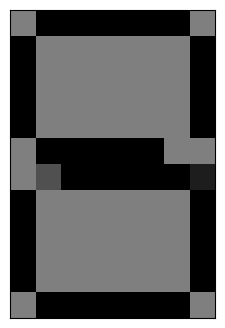

In [80]:
tt = np.array(CY).T
test = tt[:, 80].reshape(12, 8)
# test = CY[:,80].reshape(12, 8)

# Create a colormap for -1 as white and 1 as black
norm = plt.Normalize(vmin=-1, vmax=1)

# Plot the figure
plt.figure(figsize=(6, 4))
plt.imshow(test, cmap=plt.cm.gray_r, norm=norm)
plt.xticks([])  # No ticks on x axis
plt.yticks([])  # No ticks on y axis
plt.grid(False)
plt.show()

In [83]:
for p in range(40):
    otv = np.zeros((12, 8))
    ot = CY[:, p]
    for n in range(S):
        otv[n // 8, n % 8] = ot[n]
    print(otv)

[[0.         1.         1.         1.         1.         1.
  1.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         1.         1.         1.         1.         1.
  0.         0.        ]
 [0.         0.37142857 1.         1.         1.         1.
  1.         0.77142857]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         1.         1.         1.         1.         1.
  1. 

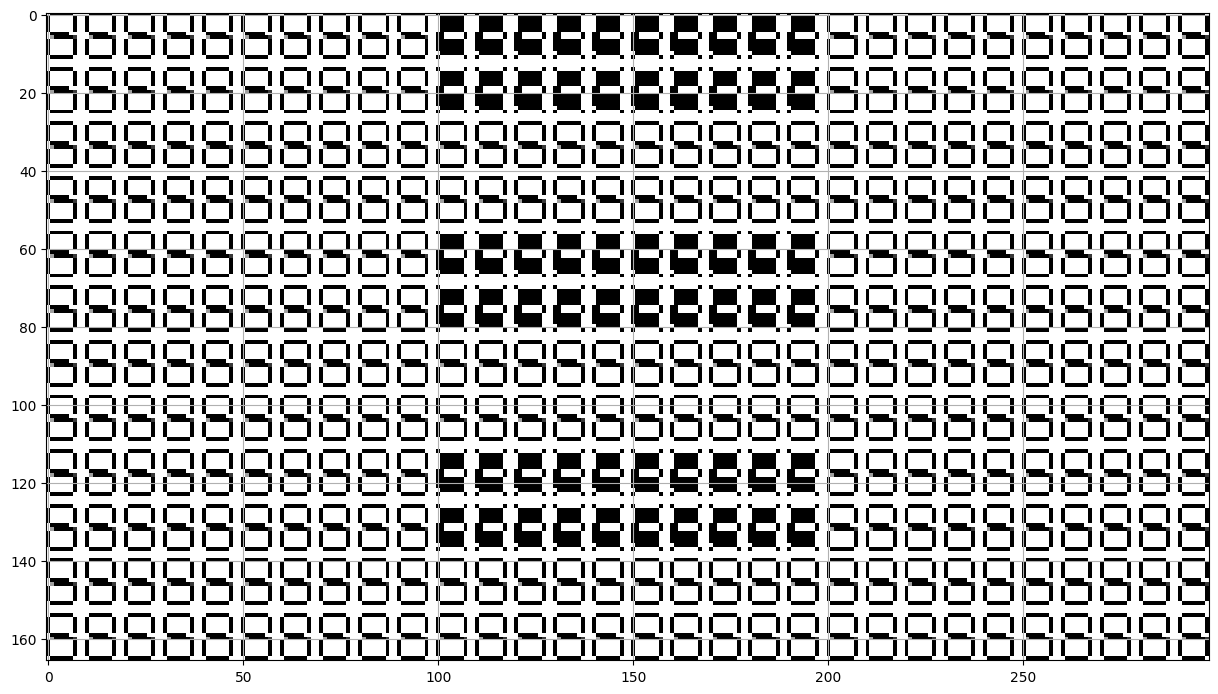

In [84]:
for p in range(Q):
    otv = np.zeros((12, 8))
    ot = CY[:, p]
    for n in range(S):
        otv[n // 8, n % 8] = ot[n]

    x = (p % n_copies) * space
    y = (p // n_copies) * space
    a = slice(
        (p // n_copies) * digit_height + y, 
        (p // n_copies + 1) * digit_height + y)
    b = slice(
        x + (p % n_copies) * digit_width, 
        x + (p % n_copies + 1) * digit_width)
    alld[a, b] = otv

# Plotting the results
fig, ax = plt.subplots(figsize=(15, 15))
# cmap = plt.cm.get_cmap('gray')
ax.imshow(alld, cmap=plt.cm.gray_r)
ax.grid(True)

plt.show()